In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=sns.load_dataset("titanic")

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [6]:
df.shape

(891, 15)

In [7]:
df.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'], dtype=object)

**Categorical columns**


* survived
* pclass
* sex
* sibsp
* parch
* embarked
* class (repeated)
* who (repeated)
* adult_male (no use)
* deck
* embark_town (repeated)
* alive
* alone

**Numerical columns**


* age  
* fare





In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived, pclass, sex, embarked, who, embark_town, alive should be category and age shouldn't be in float

pclass, embarked, who, adult_male should be dropped

In [9]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [10]:
df.drop("embarked",axis=1,inplace=True)

In [11]:
df.drop("who", axis=1, inplace=True)

In [12]:
df.drop("adult_male", axis=1, inplace=True)

In [13]:
df.drop("pclass", axis=1, inplace=True)

In [14]:
df.head()

,survived,sex,age,sibsp,parch,fare,class,deck,embark_town,alive,alone
0,0,male,22.0,1,0,7.2500,Third,NaN,Southampton,no,False
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,yes,False
2,1,female,26.0,0,0,7.9250,Third,NaN,Southampton,yes,True
3,1,female,35.0,1,0,53.1000,First,C,Southampton,yes,False
4,0,male,35.0,0,0,8.0500,Third,NaN,Southampton,no,True


In [15]:
df.isnull().sum()

,0
survived,0
sex,0
age,177
sibsp,0
parch,0
fare,0
class,0
deck,688
embark_town,2
alive,0


there are 177 in age, 688 in deck and 2 missing values in embark_town

more than 70% values are missing in deck so we will have to drop it

In [16]:
df.drop("deck", axis=1, inplace=True)

should fill the missing values in age column
and for that there are few ways and one of them is mean

In [17]:
df["age"].fillna(df["age"].mean(), inplace=True)

<ipython-input-17-11c06ea69019>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].mean(), inplace=True)


for filling values in embark_town column, should check what is the value that is repeated so many times as there are only 2 values are missing

In [18]:
df["embark_town"].value_counts()

,count
embark_town,
Southampton,644
Cherbourg,168
Queenstown,77


we can see that southampton is repeated the most

In [19]:
df["embark_town"].fillna("Southampton", inplace=True)

<ipython-input-19-8ea8672dbe2c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["embark_town"].fillna("Southampton", inplace=True)


In [20]:
df.isnull().sum()

,0
survived,0
sex,0
age,0
sibsp,0
parch,0
fare,0
class,0
embark_town,0
alive,0
alone,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   sex          891 non-null    object  
 2   age          891 non-null    float64 
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   class        891 non-null    category
 7   embark_town  891 non-null    object  
 8   alive        891 non-null    object  
 9   alone        891 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(3), object(3)
memory usage: 57.7+ KB


In [22]:
df["sibsp"].value_counts()

,count
sibsp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [23]:
df["parch"].value_counts()

,count
parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   sex          891 non-null    object  
 2   age          891 non-null    float64 
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   class        891 non-null    category
 7   embark_town  891 non-null    object  
 8   alive        891 non-null    object  
 9   alone        891 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(3), object(3)
memory usage: 57.7+ KB


**changing the following columns data types:**

survived- category

sex- category

age- int

embark_town- category

alive- category


In [25]:
df["survived"]=df["survived"].astype("category")
df["sex"]=df["sex"].astype("category")
df["age"]=df["age"].astype("int")
df["embark_town"]=df["embark_town"].astype("category")
df["alive"]=df["alive"].astype("category")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    category
 1   sex          891 non-null    category
 2   age          891 non-null    int64   
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   class        891 non-null    category
 7   embark_town  891 non-null    category
 8   alive        891 non-null    category
 9   alone        891 non-null    bool    
dtypes: bool(1), category(5), float64(1), int64(3)
memory usage: 33.8 KB


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    category
 1   sex          891 non-null    category
 2   age          891 non-null    int64   
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   class        891 non-null    category
 7   embark_town  891 non-null    category
 8   alive        891 non-null    category
 9   alone        891 non-null    bool    
dtypes: bool(1), category(5), float64(1), int64(3)
memory usage: 33.8 KB


In [28]:
df.describe()

,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.544332,0.523008,0.381594,32.204208
std,13.013778,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


UNIVARIATE ANALYSIS

lets start with the target column that is "survived"

out of 891 62 percent of the people died in the accident


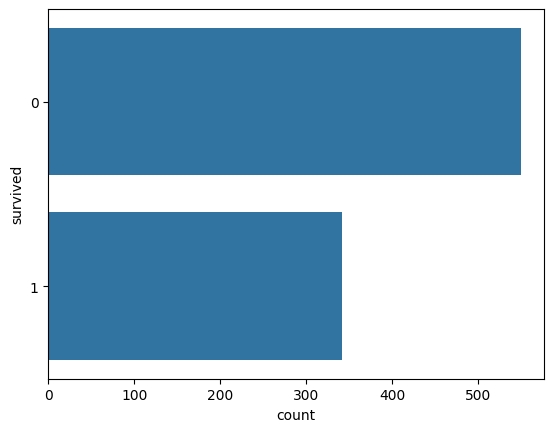

In [29]:
sns.countplot(df["survived"])
death_percent=round((df["survived"].value_counts().values[0]/891)*100)
print("out of 891 {} percent of the people died in the accident".format(death_percent))

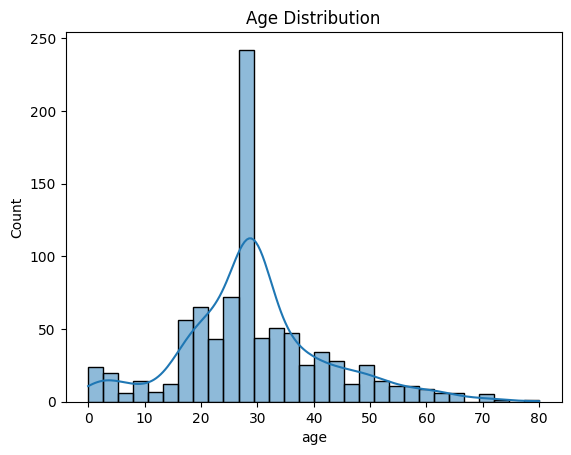

In [31]:
sns.histplot(df['age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

The age distribution of Titanic passengers is right-skewed, with most individuals aged between 20 and 40 years. A smaller number of children (ages 0–10) and elderly passengers (above 60) are also present. The Kernel Density Estimate (KDE) curve shows a peak around the mid-20s, indicating that young adults were the most common age group onboard.

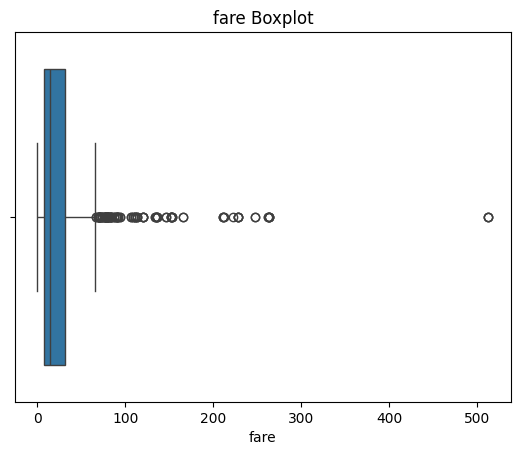

In [32]:
# Fare Boxplot
sns.boxplot(x=df['fare'])
plt.title('fare Boxplot')
plt.show()

The boxplot shows that the majority of fares are relatively low, with a long tail of high-fare outliers.

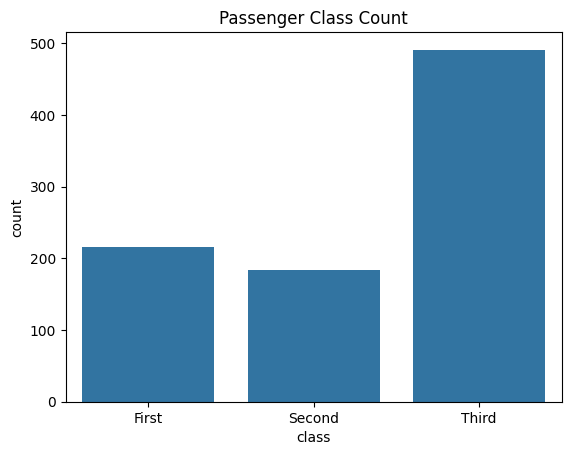

In [33]:
# class Countplot
sns.countplot(x='class', data=df)
plt.title('Passenger Class Count')
plt.show()

Most passengers belonged to the third class, followed by the first and second classes.

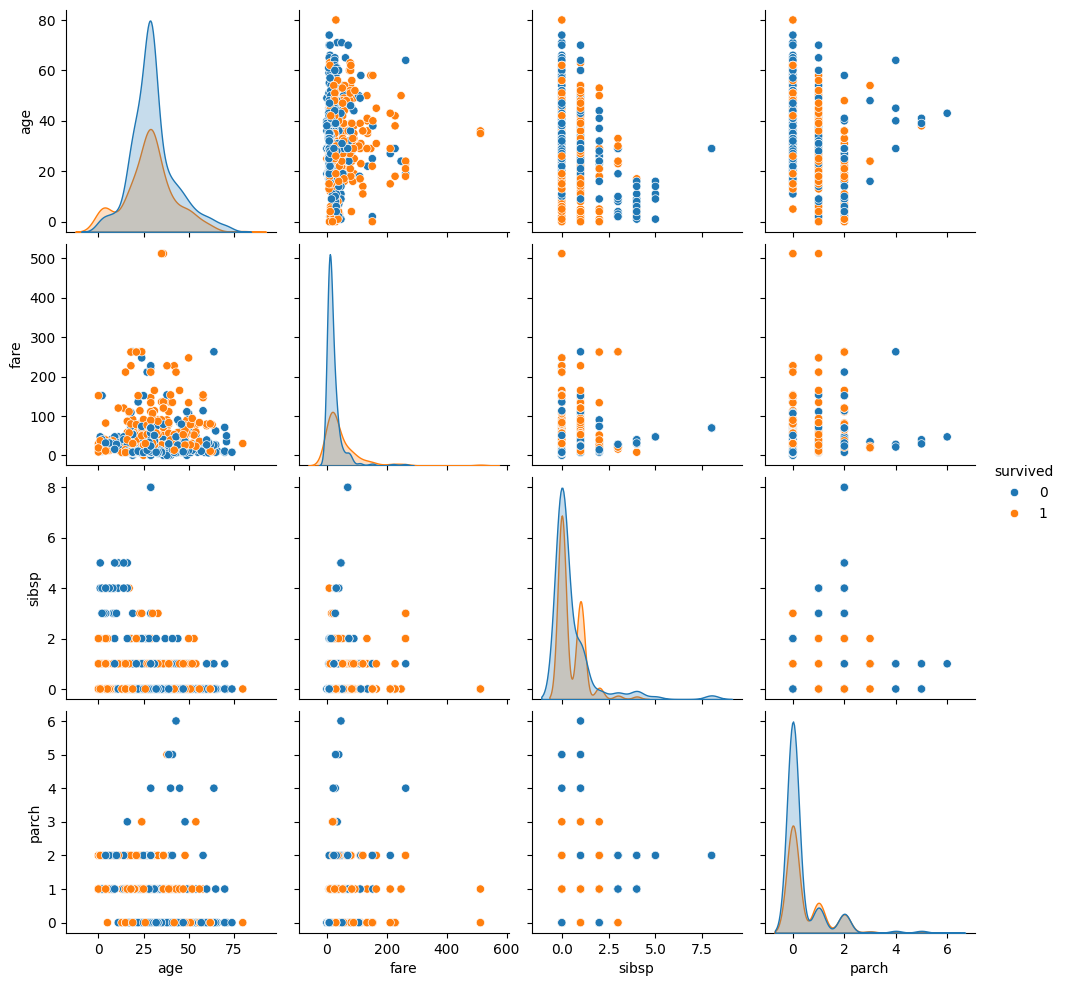

In [35]:
# Pairplot
sns.pairplot(df[['survived', 'class', 'sex', 'age', 'fare', 'sibsp', 'parch']].dropna(), hue='survived')
plt.show()

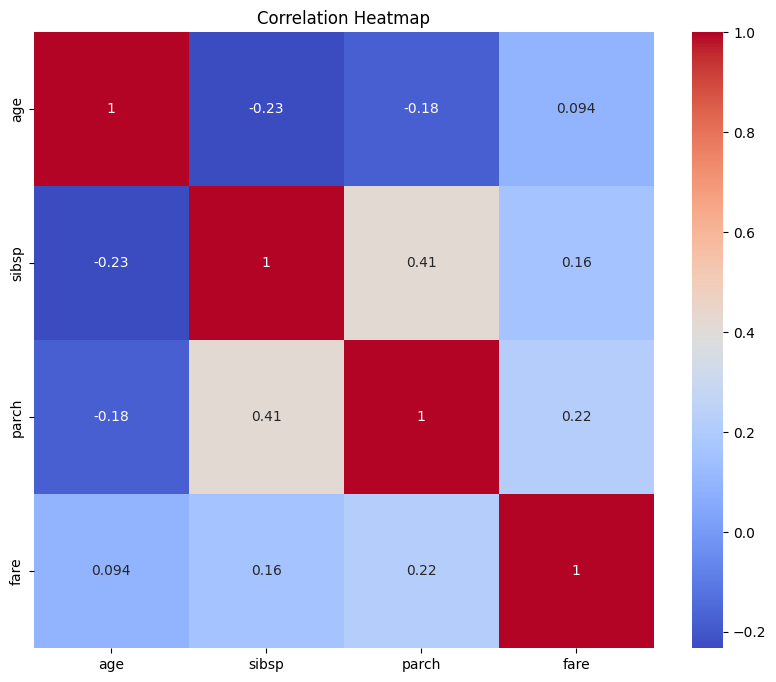

In [36]:
# Correlation Heatmap
plt.figure(figsize=(10,8))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap reveals several important relationships among the numerical features:

Fare shows a moderate positive correlation with Pclass (negatively, because lower class numbers mean higher class).

Survived has a weak negative correlation with Pclass, meaning passengers in lower-numbered classes (1st class) were more likely to survive.

SibSp (siblings/spouses aboard) and Parch (parents/children aboard) show a slight positive correlation, indicating that passengers traveling with family tended to have related family members.

Overall, correlations with Survived are relatively weak, suggesting that multiple factors combined (not just one variable) influenced survival.